In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor


In [2]:
df= pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:>

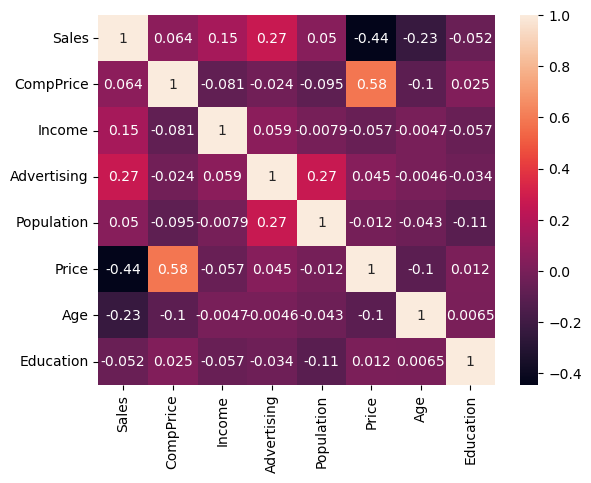

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
oe=OrdinalEncoder()
char_col=df.select_dtypes('object').columns
df[char_col]=oe.fit_transform(df[char_col])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0


In [7]:
x=df.iloc[:,1:]
y=df['Sales']

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

In [9]:
def fun(model):
    re=model
    re.fit(xtrain,ytrain)
    ypred=re.predict(xtest)
    
    print(r2_score(ytest,ypred))
    print(f'tranning score {re.score(xtrain,ytrain)}')
    print(f'testing score {re.score(xtest,ytest)}')

In [10]:
fun(RandomForestRegressor())

0.6764279102776335
tranning score 0.9541938004120539
testing score 0.6764279102776335


In [11]:
params={
    'criterion':["squared_error", "absolute_error", "poisson"],
    'max_features':['auto','log','sqrt'],
    'min_samples_split':[2,4,6,5,9],
    'max_depth':[2,4,5,7,9]
}

In [12]:
grid=GridSearchCV(RandomForestRegressor(),param_grid=params,verbose=-1)


In [13]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [2, 4, 5, 7, 9],
                         'max_features': ['auto', 'log', 'sqrt'],
                         'min_samples_split': [2, 4, 6, 5, 9]},
             verbose=-1)

In [14]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 5}

In [15]:
fun(RandomForestRegressor(criterion='squared_error',max_features='auto',min_samples_split=2, max_depth=9))

0.6533179247470327
tranning score 0.9485687867981537
testing score 0.6533179247470327


In [16]:
df['Sales'].mean()

7.496325

In [17]:
df['sales']='Good'
df.loc[(df['Sales']<7.496,'sales')]='Bad'

In [18]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0,Good
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0,Good
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0,Good
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0,Bad
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0,Good
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0,Bad
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0,Bad
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0,Bad


In [19]:
x=df.iloc[:,1:-1]
y=df['sales']

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)


In [21]:
def fun(model):
    re=model
    re.fit(xtrain,ytrain)
    ypred=re.predict(xtest)
    
    print(classification_report(ytest,ypred))
    print(f'tranning score {re.score(xtrain,ytrain)}')
    print(f'testing score {re.score(xtest,ytest)}')

In [22]:
fun(RandomForestClassifier())

              precision    recall  f1-score   support

         Bad       0.84      0.75      0.79        64
        Good       0.75      0.84      0.79        56

    accuracy                           0.79       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.80      0.79      0.79       120

tranning score 1.0
testing score 0.7916666666666666


In [23]:
params={
    'criterion':['gini','entropy'],
    'max_features':['auto','log','sqrt'],
    'min_samples_split':[2,4,6,5,9],
    'max_depth':[4,5,7,9,12]
}

In [24]:
grid=GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=-1)


In [25]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 7, 9, 12],
                         'max_features': ['auto', 'log', 'sqrt'],
                         'min_samples_split': [2, 4, 6, 5, 9]},
             verbose=-1)

In [26]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_split': 2}

In [27]:
fun(RandomForestClassifier(criterion='entropy',max_features='sqrt',min_samples_split=4 ,max_depth=12 ))
 

              precision    recall  f1-score   support

         Bad       0.85      0.78      0.81        64
        Good       0.77      0.84      0.80        56

    accuracy                           0.81       120
   macro avg       0.81      0.81      0.81       120
weighted avg       0.81      0.81      0.81       120

tranning score 1.0
testing score 0.8083333333333333


In [28]:
#tranning score 1.0
#testing score 0.8166666666666667

In [29]:
import matplotlib.pyplot as plt

In [30]:
re=RandomForestClassifier(criterion='entropy',max_features='sqrt',min_samples_split=4 ,max_depth=12 )


In [31]:
re.fit(xtrain,ytrain)
ypred=re.predict(xtest)

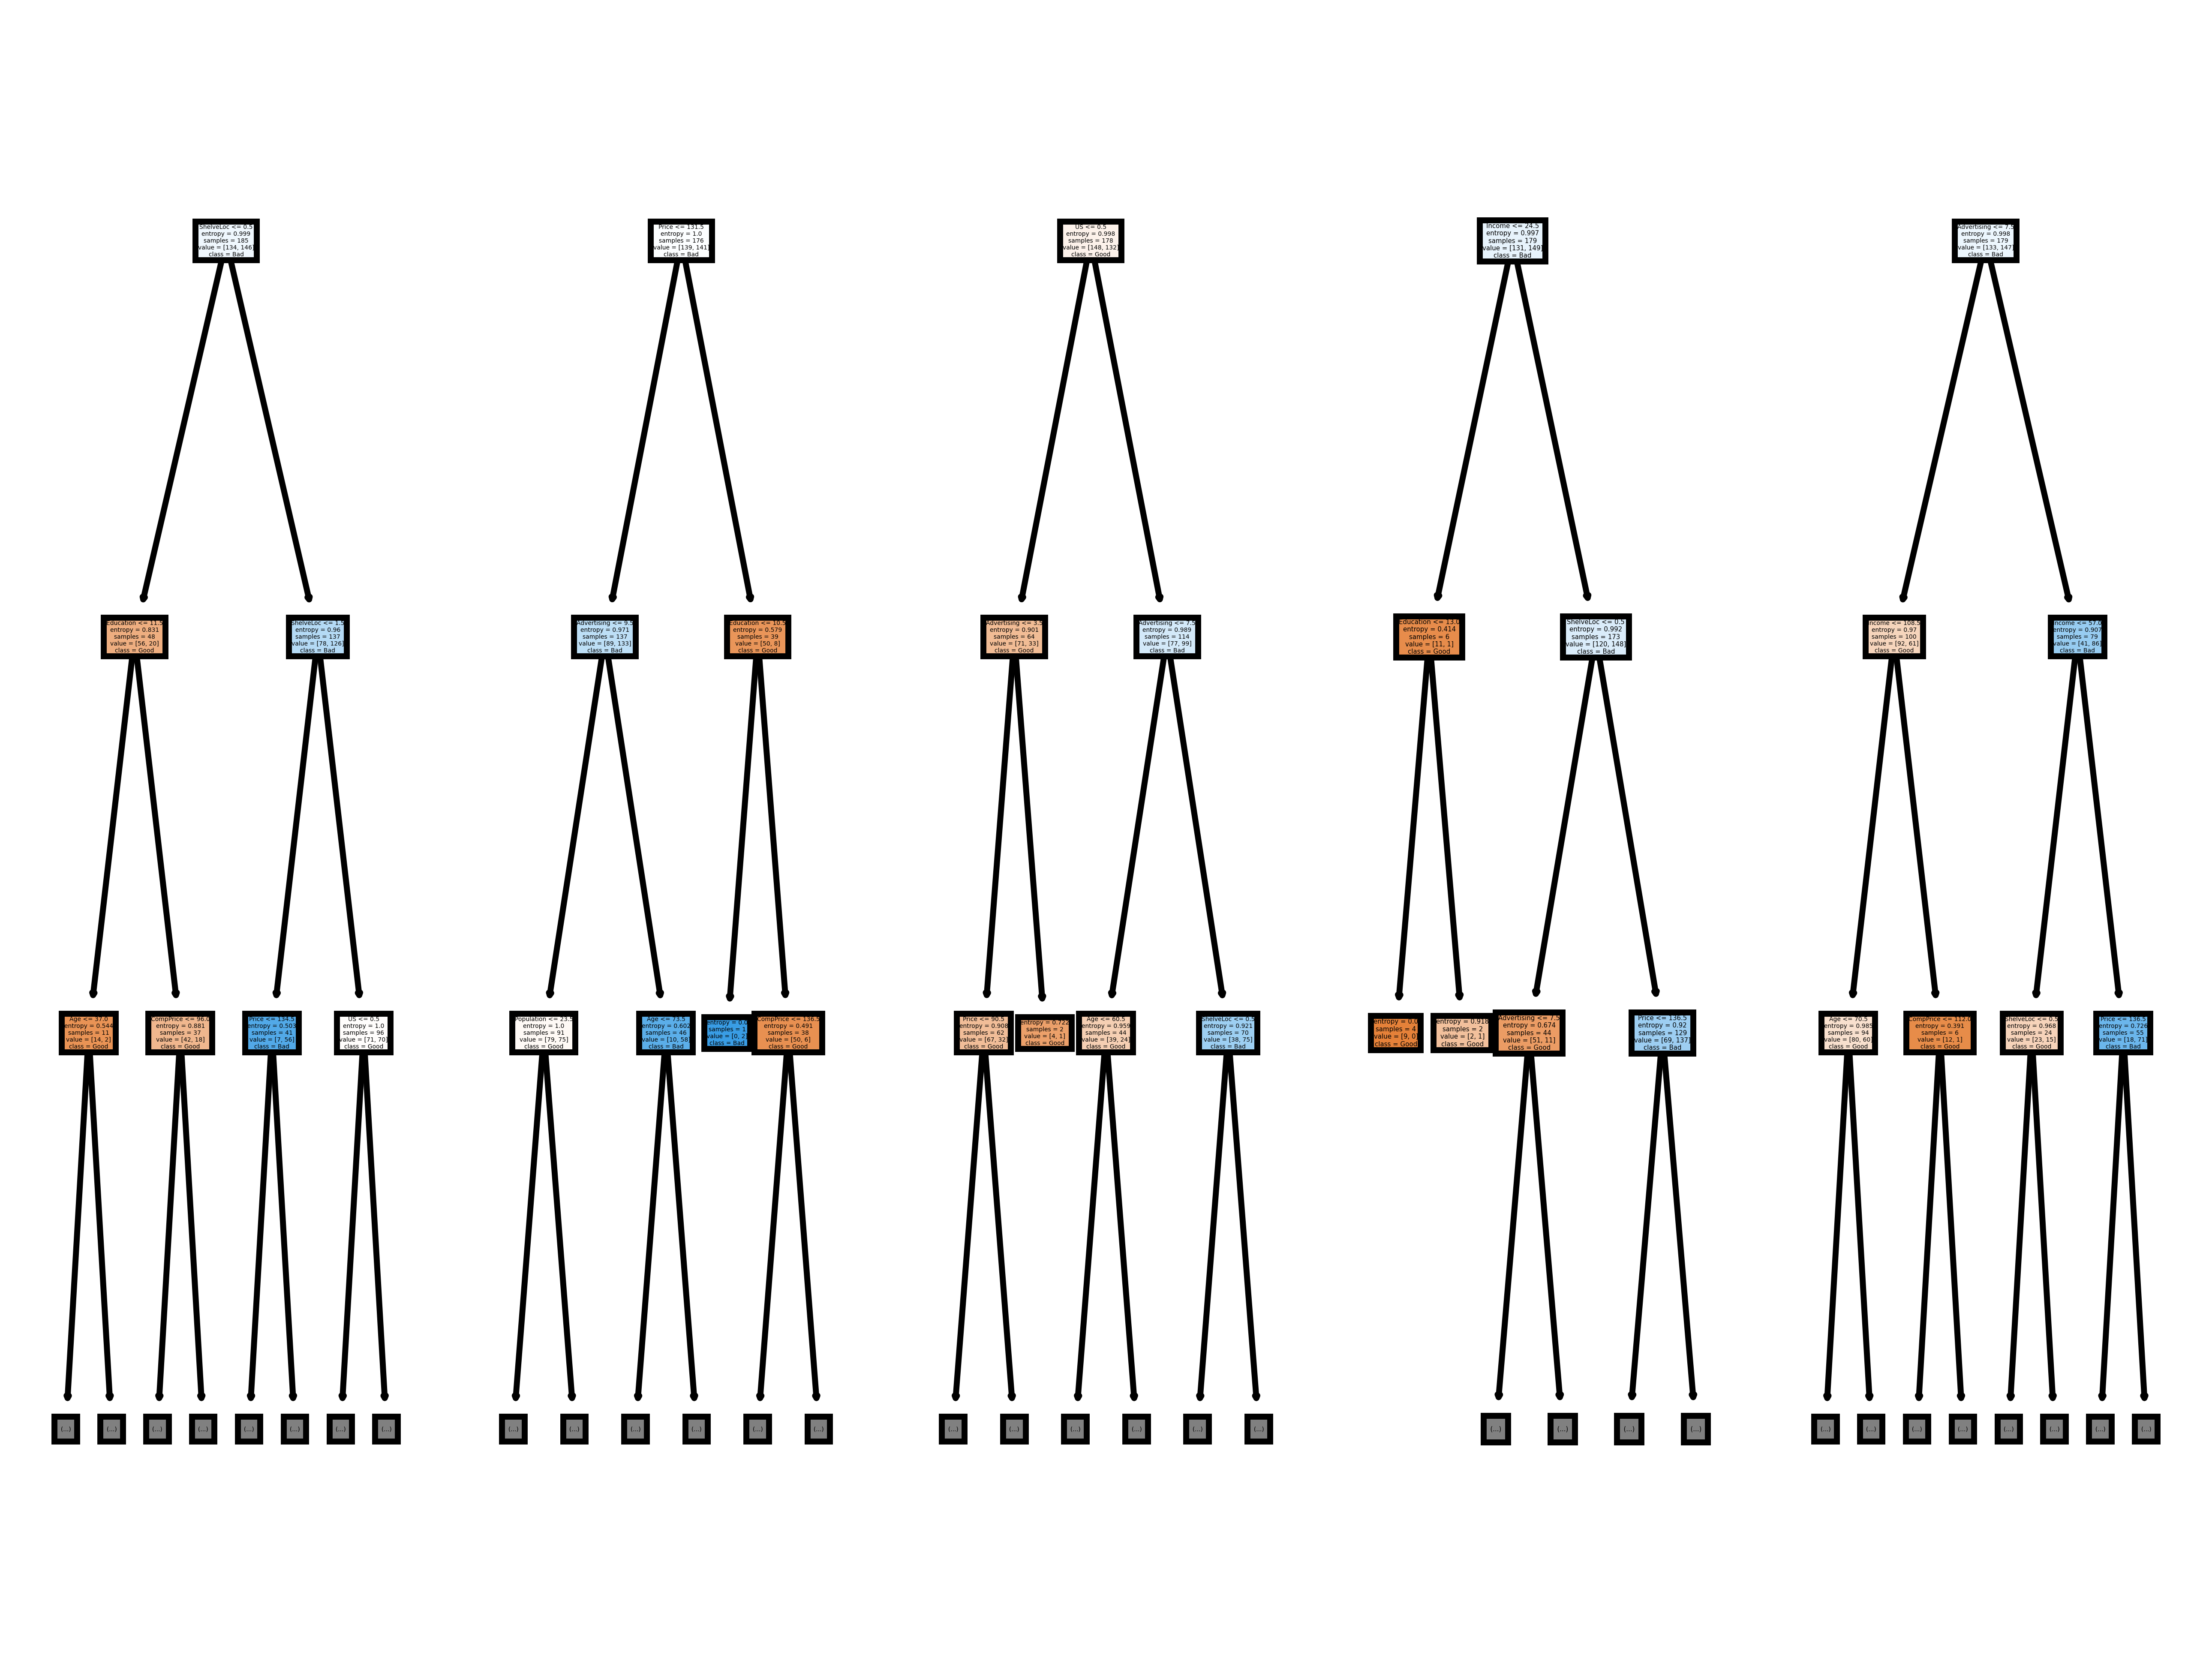

In [32]:
fig,index = plt.subplots(1,5, dpi = 1000)

for i in range(0,5):
    tree.plot_tree(re.estimators_[i],
                  feature_names=x.columns,
                  class_names=df['sales'].unique(),
                   max_depth=2,
                   filled=True,
                  ax = index[i])